# Programming tasks: part 3
Required datasets: `SAheart.csv`, `earthquake.csv`, `pima.csv`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import roc_curve, roc_auc_score

## Task 1

### a) Fit a logistic regression model on the `SAheart.csv` dataset.

In [ ]:
dataframe = pandas.read_csv('SAheart.csv', header=0)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


In [ ]:
dataframe.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [ ]:
dataframe['famhist'].unique()

array(['Present', 'Absent'], dtype=object)

In [ ]:
data = dataframe.values
X, y = data[:,:-1], data[:,-1]

In [ ]:
from sklearn.preprocessing import LabelEncoder
X[:,4] = LabelEncoder().fit_transform(X[:,4])
y = LabelEncoder().fit_transform(y)

In [ ]:
logreg = LogisticRegression(penalty='none', max_iter=1000)
logreg.fit(X, y)      # normally you shouldn't use the entire dataset
logreg.predict_proba(X[:10,:])

array([[0.28799887, 0.71200113],
       [0.66905233, 0.33094767],
       [0.7191853 , 0.2808147 ],
       [0.28303424, 0.71696576],
       [0.30720386, 0.69279614],
       [0.38249581, 0.61750419],
       [0.78085182, 0.21914818],
       [0.36988511, 0.63011489],
       [0.85443038, 0.14556962],
       [0.3891538 , 0.6108462 ]])

Another way of calculating prediction probability is to use the `decision_function` method

In [ ]:
z = logreg.decision_function(X)
prob = np.exp(z)/(1+np.exp(z))
prob[:10]

array([0.71200113, 0.33094767, 0.2808147 , 0.71696576, 0.69279614,
       0.61750419, 0.21914818, 0.63011489, 0.14556962, 0.6108462 ])

### c) Calculate the odds ratio for when we increase the patients age by 1, leaving the other vairables unchanged

In [ ]:
np.exp(logreg.coef_[0,-1])

1.0462388863556833

## Task 2
Load `earthquake.csv`.

In [ ]:
dataframe = pandas.read_csv('earthquake.csv', header=0)
dataframe.head()

,popn,body,surface
0,equake,5.60,4.25
1,equake,5.18,3.93
2,equake,6.31,6.30
3,equake,5.36,4.49
4,equake,5.96,6.39


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   popn     29 non-null     object 
 1   body     29 non-null     float64
 2   surface  29 non-null     float64
dtypes: float64(2), object(1)
memory usage: 824.0+ bytes


In [ ]:
data = dataframe.values
X, y = data[:, 1:], data[:, 0]
print(X[:3,:], y[:3])

[[5.6 4.25]
 [5.18 3.93]
 [6.31 6.3]] ['equake' 'equake' 'equake']


In [ ]:
y = LabelEncoder().fit_transform(y)
y[:3]

array([0, 0, 0])

### a) Draw a scatter plot for `body` and `surface` variables.

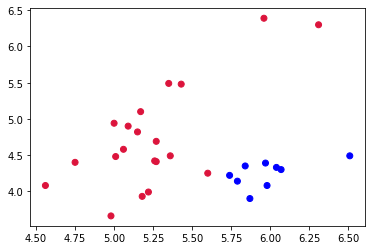

In [ ]:
colormap = np.array(['crimson', 'blue'])
plt.scatter(X[:,0], X[:,1], c = colormap[y])
plt.show()

### b) Fit a logistic regression model. Why are the values of coefficients so big?

In [ ]:
logreg = LogisticRegression(penalty='none', max_iter=1000)
logreg.fit(X,y)
print(logreg.coef_, logreg.intercept_)

[[ 146.40894937 -151.81204304]] [-184.8930899]


The coefficients are large, because our data is linearly separable, as we can see from the scatter plot. We can fix this by adding a penalty.

In [ ]:
logreg = LogisticRegression(penalty='l1', solver ='liblinear', max_iter=1000)
logreg.fit(X,y)
print(logreg.coef_, logreg.intercept_)

[[ 1.98991055 -2.6556328 ]] [0.]


## Task 3
Load `pima.csv`

In [ ]:
dataframe = pandas.read_csv('pima.csv', header=0)
dataframe.head()

,times,glucose,blood,skin,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   times     768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   blood     768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   BMI       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   class     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### a) Split the dataset into training and test sets.

In [ ]:
data = dataframe.values
X, y = data[:,:-1], data[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### b) Use the training set to fit a decision tree with `min_samples_split`=5.

In [ ]:
clf = tree.DecisionTreeClassifier(random_state=123, min_samples_split=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=5, random_state=123)

### c) Use the training set to fit a logistic regression model.

In [ ]:
logreg = LogisticRegression(penalty='none', max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='none')

### d) Calculate the FPR and TPR of both models using the `predict_proba` method and the `roc_curve` function. Plot the ROC curve for both models. Calculate AUC.

In [ ]:
clf_probs = clf.predict_proba(X_test)
clf_probs = clf_probs[:, 1]
logreg_probs = logreg.predict_proba(X_test)
logreg_probs = logreg_probs[:, 1] 

clf_fpr, clf_tpr, _ = roc_curve(y_test, clf_probs)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)

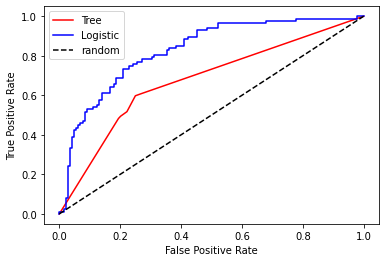

In [ ]:
# plot the roc curve for the model
plt.plot(clf_fpr, clf_tpr, c= 'red', label='Tree')
plt.plot(logreg_fpr, logreg_tpr, c = 'blue', label='Logistic')
plt.plot([0, 1], [0, 1], color='black', linestyle='--',label = 'random')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
clf_auc = roc_auc_score(y_test, clf_probs)
logreg_auc = roc_auc_score(y_test, logreg_probs)

print('Tree: ROC AUC='+str(clf_auc))
print('Logistic: ROC AUC='+str(logreg_auc))

Tree: ROC AUC=0.6756066411238826
Logistic: ROC AUC=0.8291826309067688
